## 0. Постановка задачи

На сайт «СберАвтоподписка» заходят пользователи и совершают некоторые действия (или не совершают).

Имеются данные из Google Analytics (last-click attribution model) по сайту «СберАвтоподписка» в виде двух файлов `ga_sessions.csv` и `ga_hits.csv`. <br><br>

### Описание файла ga_sessions.csv <br>

Одна строка = один визит на сайт.

Описание атрибутов:
* session_id — ID визита;
* client_id — ID посетителя;
* visit_date — дата визита;
* visit_time — время визита;
* visit_number — порядковый номер визита клиента;
* utm_source — канал привлечения;
* utm_medium — тип привлечения;
* utm_campaign — рекламная кампания;
* utm_keyword — ключевое слово;
* device_category — тип устройства;
* device_os — ОС устройства;
* device_brand — марка устройства;
* device_model — модель устройства;
* device_screen_resolution — разрешение экрана;
* device_browser — браузер;
* geo_country — страна;
* geo_city — город. <br>

Органический трафик — все визиты с `ga_sessions.utm_medium:`<br> 
'organic', 'referral', '(none)'.<br><br>
Платный трафик — весь неорганический трафик.<br><br>
Информация про марку и модель авто — содержится в `ga_hits.hit_page_path`.<br><br>
Реклама в социальных сетях — все визиты с `ga_sessions.utm_source:`<br> 
QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs',
'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw',
'gVRrcxiDQubJiljoTbGm'.<br><br>


### Описание файла ga_hits.csv <br>

Одна строка = одно событие в рамках одного визита на сайт.

Описание атрибутов:
* session_id — ID визита;
* hit_date — дата события;
* hit_time — время события;
* hit_number — порядковый номер события в рамках сессии;
* hit_type — тип события;
* hit_referer — источник события;
* hit_page_path — страница события;
* event_category — тип действия;
* event_action — действие;
* event_label — тег действия;
* event_value — значение результата действия.<br><br>

Целевые значания `ga_hits.event_action:` <br>
'sub_car_claim_click', 'sub_car_claim_submit_click',
'sub_open_dialog_click', 'sub_custom_question_submit_click',
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
'sub_car_request_submit_click'<br><br>

### Описание задачи <br>
* Настроить и запустить локальную БД, подходящую для хранения
и исполнения запросов к данным в предоставленном датасете.
* Создать объекты в БД для хранения данных исходного файла.
* Обработать и поместить в БД данные из предоставленного основного датасета.
* Настройте пайплайн сбора, обработки и записи в БД новых .json-файлов.

## 1. Импорт библиотек

In [124]:
import datetime as dt
import json
import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd

## 2. Загрузка данных

In [2]:
df_hits = pd.read_csv('data/ga_hits.csv')
df_hits.head(10)

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN
5,6466333295973247896.1640246168.1640246168,2021-12-23,704194.0,41,event,NaN,sberauto.com/cars?utm_source_initial=youtube&u...,quiz,quiz_show,NaN,NaN
6,281215510786615563.1640245516.1640245516,2021-12-23,911854.0,102,event,NaN,sberauto.com/cars/toyota?isnew=false&rental_ca...,quiz,quiz_show,NaN,NaN
7,4024492994895054107.1640269084.1640269084,2021-12-23,1071804.0,85,event,NaN,sberauto.com/cars/all/mercedes-benz/glc/f8f330...,quiz,quiz_show,NaN,NaN
8,555009234841130092.1640256620.1640256620,2021-12-23,1013899.0,101,event,VloVXNWduHeTjUoDkjkO,sberauto.com/cars/all/kia/sorento/c38179cb?utm...,quiz,quiz_show,NaN,NaN
9,2692901778487480807.1640206845.1640206845,2021-12-23,0.0,1,event,NaN,sberauto.com/cars/all/nissan/x-trail/0744675f?...,card_web,view_card,NaN,NaN


In [3]:
df_sess = pd.read_csv('data/ga_sessions.csv', low_memory=False)
df_sess.head(10)

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
5,9055447192389856083.1622453074.1622453074,2108385598.1622453075,2021-05-31,12:00:00,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,375x812,Safari,Russia,Saint Petersburg
6,9055455318486370642.1640843788.1640843788,2108387490.1640843602,2021-12-30,08:56:28,1,TxKUcPpthBDPieTGmVhx,cpc,FTjNLDyTrXaWYgZymFkV,LcGIUNPUAmXtQJaDfFBR,PwscUHjoUJDrtfWESIHj,tablet,Android,Lenovo,NaN,602x1029,YaBrowser,Russia,Saint Petersburg
7,9055461992850812764.1626107740.1626107740,2108389044.1626107740,2021-07-12,19:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,NaN,360x640,Chrome,Russia,Saint Petersburg
8,9055462349345527315.1638536723.1638536723,2108389127.1638536723,2021-12-03,16:05:23,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,NaN,390x844,Safari,Russia,Moscow
9,9055466554104774132.1624800757.1624800757,2108390106.1624800756,2021-06-27,16:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,NaN,412x915,Chrome,Russia,Moscow


## 3. Data Preparation - Подготовка данных

In [6]:
print(f'Размер датафрейма "ga_hits": {df_hits.shape}')
print(f'Размер датафрейма "ga_sessions":, {df_sess.shape}')

Размер датафрейма "ga_hits": (15726470, 11)
Размер датафрейма "ga_sessions":, (1860042, 18)


In [4]:
df_hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ GB


In [9]:
df_hits.describe(include='all')

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
count,15726470,15726470,6.566148e+06,1.572647e+07,15726470,9451666,15726470,15726470,15726470,11966286,0.0
unique,1734610,226,NaN,NaN,1,37873,342715,52,230,39825,NaN
top,5442565791571325612.1632449195.1632449195,2021-05-24,NaN,NaN,event,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,card_web,view_card,KclpemfoHstknWHFiLit,NaN
freq,768,513035,NaN,NaN,15726470,8879187,2793639,7456998,3558985,6505447,NaN
mean,NaN,NaN,2.091050e+05,2.356715e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,4.032110e+05,2.887713e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000e+00,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.412000e+04,7.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,8.994100e+04,1.500000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.195352e+05,2.900000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_sess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB


In [16]:
df_sess.describe(include='all')

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
count,1860042,1860042,1860042,1860042,1.860042e+06,1859945,1860042,1640439,1524427,777981,1860042,789904,1492864,16338,1860042,1860042,1860042,1860042
unique,1860042,1391719,226,85318,NaN,293,56,412,286,1219,3,13,205,104,5039,57,166,2548
top,9055434745589932991.1637753792.1637753792,1750498477.1629450062,2021-05-24,12:00:00,NaN,ZpYIoDJMcFzVoPFsHGJL,banner,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Apple,AuMdmADEIoPXiWpTsBEj,414x896,Chrome,Russia,Moscow
freq,1,462,39453,61067,NaN,578290,552272,463481,1006599,506819,1474871,464054,551088,9778,169090,1013436,1800565,805329
mean,NaN,NaN,NaN,NaN,2.712804e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.182907e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Проверка дубликатов

In [19]:
df_hits.duplicated().any()

False

In [21]:
df_sess.duplicated().any()

False

Дубликатов в обеих таблицах нет.

### Преобразование типов данных

Поменяем тип данных на datetime в стобце hit_date  

In [4]:
df_hits.hit_date = pd.to_datetime(df_hits.hit_date)

 visit_date и visit_time объединим в одну колонку

In [5]:
df_sess.visit_date = pd.to_datetime(df_sess.visit_date + ' ' + df_sess.visit_time)

visit_time удалим

In [6]:
df_sess = df_sess.drop(columns='visit_time')
df_sess.shape

(1860042, 17)

### Проверка на наличие пропусков

Процент пропущенных значений в таблице df_hits

In [10]:
((df_hits.isna().sum() / len(df_hits)) * 100).sort_values()

session_id          0.000000
hit_date            0.000000
hit_number          0.000000
hit_type            0.000000
hit_page_path       0.000000
event_category      0.000000
event_action        0.000000
event_label        23.909905
hit_referer        39.899634
hit_time           58.247795
event_value       100.000000
dtype: float64

<AxesSubplot: >

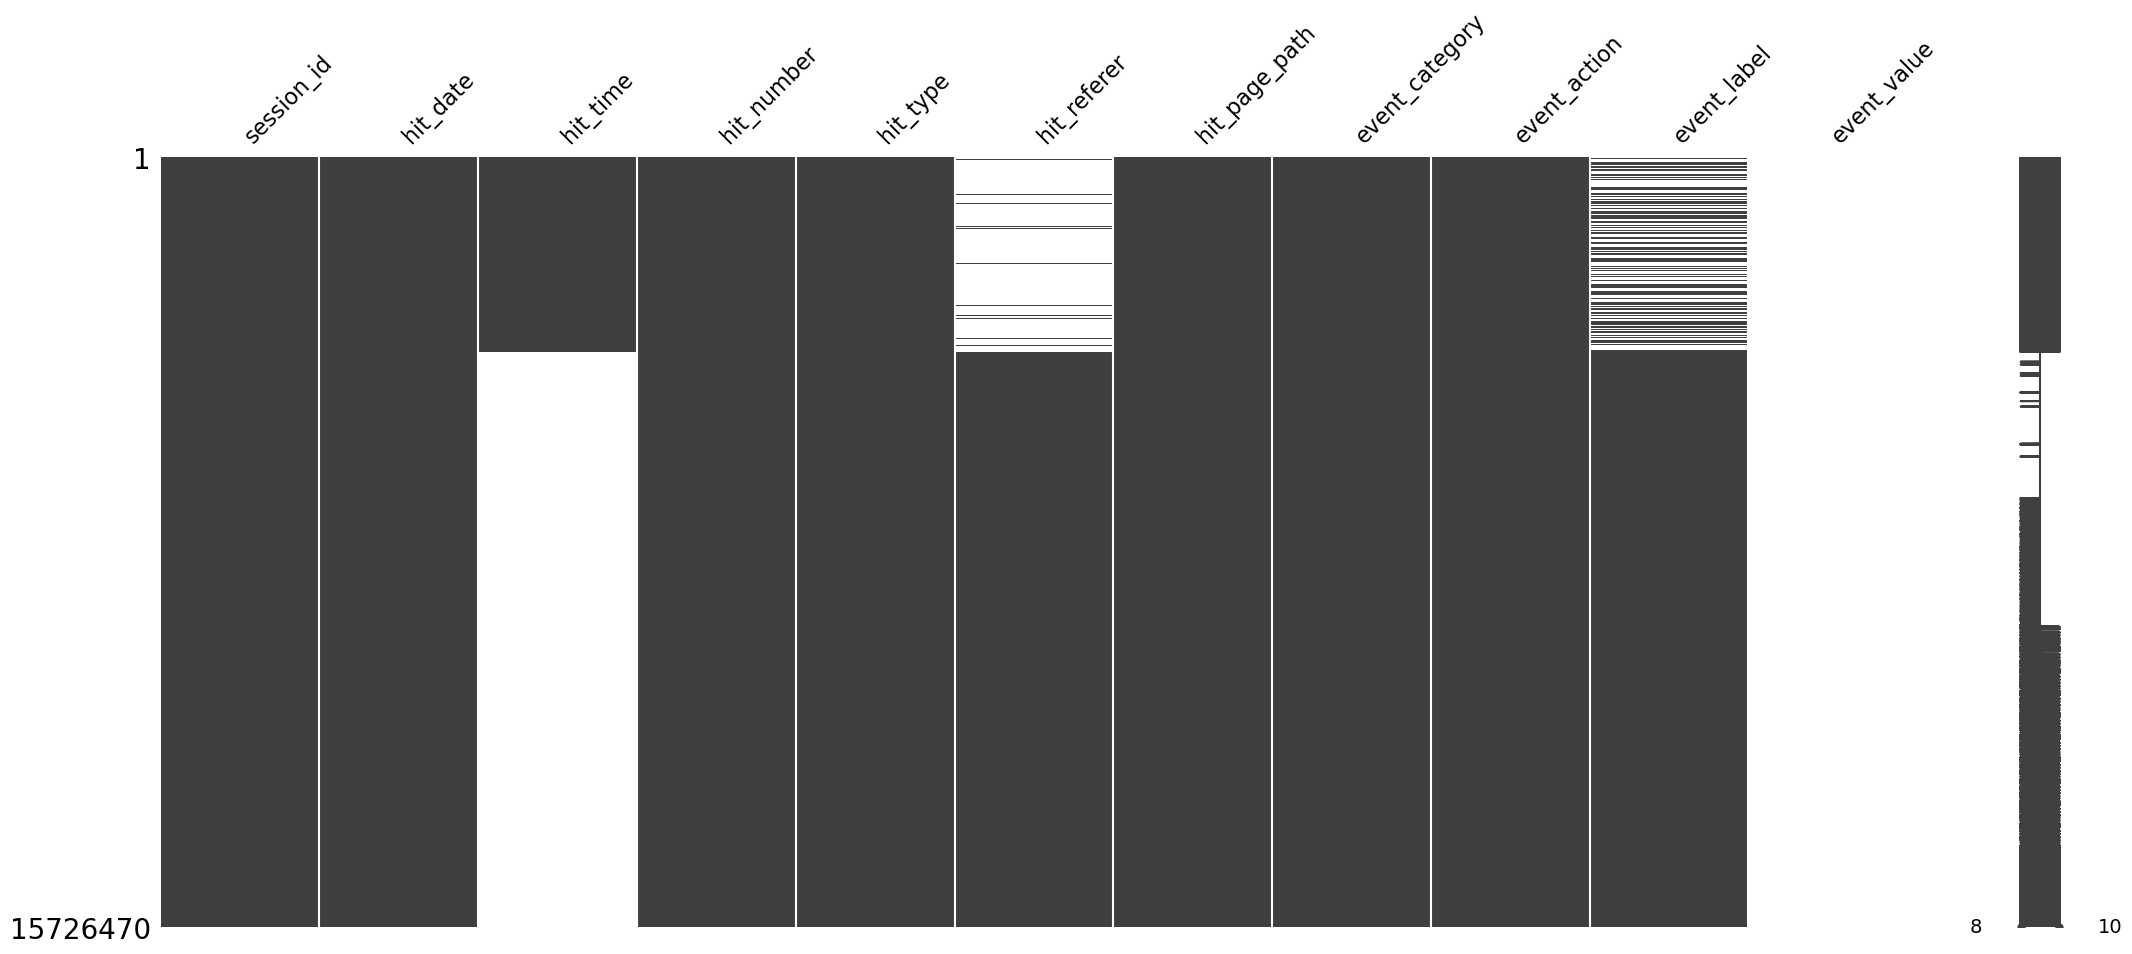

In [3]:
msno.matrix(df_hits)

Сразу удалим столбцы, где пропусков больше 20% и столбец hit_type, во всех строках значение 'event'.

In [7]:
df_hits_new = df_hits.drop(columns=['hit_time',
                                'hit_type', 
                                'event_value',
                                'hit_referer',
                                'event_label'])
df_hits_new.shape

(15726470, 6)

Так как в рамках одного визита может быть множество событий, а мы удалили часть столбцов, могут появится дубликаты. Проверим еще раз дубликаты в таблице df_hits_new и удалим их

In [9]:
df_hits_new.duplicated().sum()

225862

In [8]:
df_hits_new = df_hits_new.drop_duplicates()
df_hits_new.shape

(15500608, 6)

In [9]:
((df_hits_new.isna().sum() / len(df_hits_new)) * 100).sort_values()

session_id        0.0
hit_date          0.0
hit_number        0.0
hit_page_path     0.0
event_category    0.0
event_action      0.0
dtype: float64

Пропусков в таблице df_hits_new нет

Процент пропущенных значений в таблице df_sess

In [10]:
((df_sess.isna().sum() / len(df_sess)) * 100).sort_values()

session_id                   0.000000
device_browser               0.000000
device_screen_resolution     0.000000
device_category              0.000000
geo_country                  0.000000
utm_medium                   0.000000
geo_city                     0.000000
visit_number                 0.000000
visit_time                   0.000000
visit_date                   0.000000
client_id                    0.000000
utm_source                   0.005215
utm_campaign                11.806346
utm_adcontent               18.043410
device_brand                19.740307
device_os                   57.533002
utm_keyword                 58.174009
device_model                99.121633
dtype: float64

<AxesSubplot: >

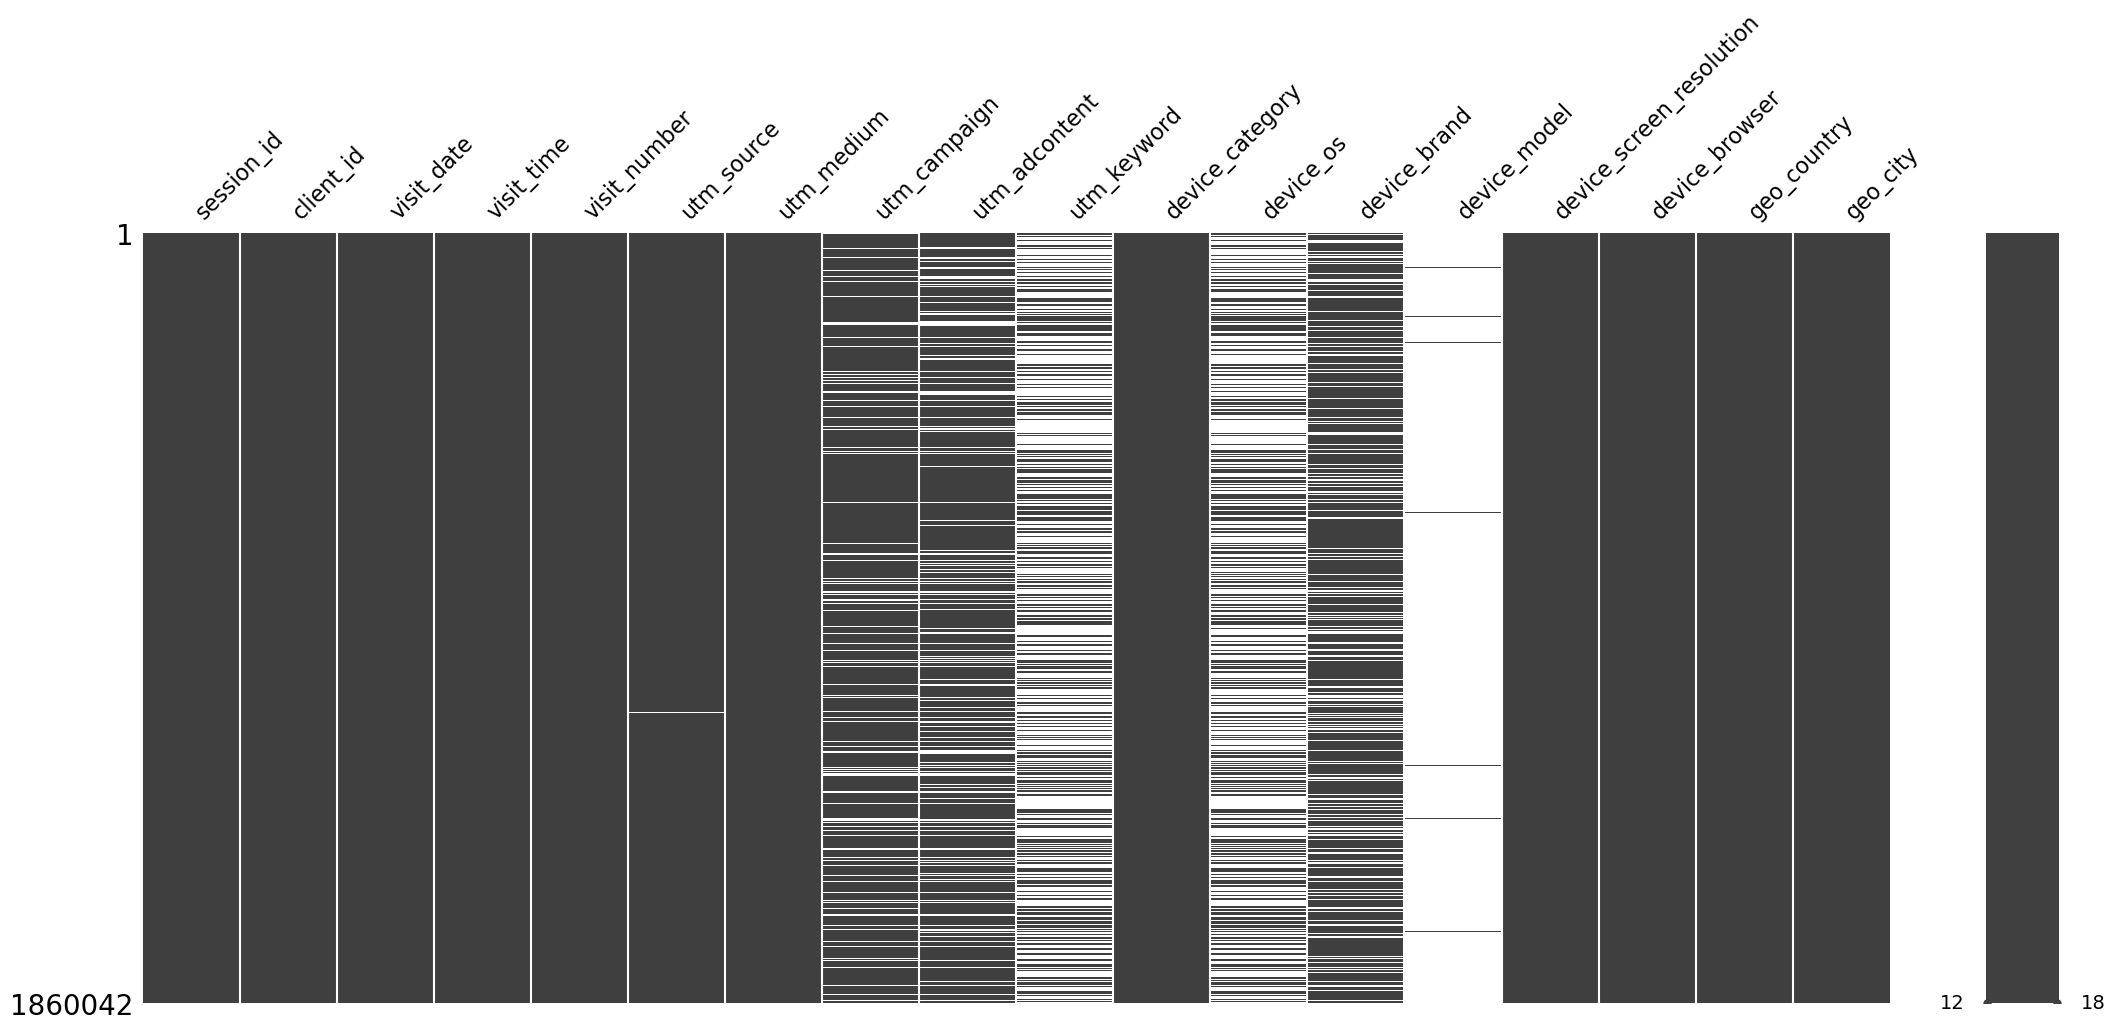

In [6]:
msno.matrix(df_sess)

Удалим столбцы utm_keyword, device_model, большой процент пропусков 

In [10]:
df_sess_new = df_sess.drop(columns=['utm_keyword', 'device_model'])
df_sess_new.shape

(1860042, 15)

Удалим столбец client_id, он не с чем не связан

In [11]:
df_sess_new = df_sess_new.drop(columns='client_id')
df_sess_new.shape

(1860042, 14)

### Заполнение пропусков

In [14]:
df_sess_new.utm_campaign.describe()

count                  1640439
unique                     412
top       LTuZkdKfxRGVceoWkVyg
freq                    463481
Name: utm_campaign, dtype: object

In [104]:
df_sess_new.utm_campaign.unique()

array(['LEoPHuyFvzoNfnzGgfcd', 'FTjNLDyTrXaWYgZymFkV', 'other',
       'LTuZkdKfxRGVceoWkVyg', 'gecBYcKZCPMcVYdSSzKP',
       'eimRuUrNhZLAYcwRrNXu', 'LwJZxKuWmvOhPsaCeRjG',
       'okTXSMadDkjvntEHzIjp', 'MXqmDyetMTICSSitTjWV',
       'PXQWdUxeUoXfoKzTBGpY', 'zxoiLxhuSIFrCeTLQVWZ',
       'nSReTmyFtbSjlPrTKoaX', 'TmThBvoCcwkCZZUWACYq',
       'BVKxkCOHKUOvkpbrLMgZ', 'QEejXfOCtOMFLZqIPApp',
       'kVOrIKZFrEYGvixPclal', 'XHNUiSKKGTEpSAlaVMFQ',
       'foFTSdUvNqqkPzZvgiqt', 'SgIUDYUKnyWHVowUOqid',
       'BAZCuyHZnaPrMGOMrcCQ', 'bxOTvPtyGSdUrbwoXCPO',
       'DXVdsSTQphSYVmRchYKt', 'GWZGdHKPgmZPNPwkJshU',
       'JwYIveaHVpeeRZloQCfF', 'VBmazutCflYumtDHrQYe',
       'dZqEgyoxhtbeLFMtnnVR', 'UvuMsOSDBWQGOIbDbXfV',
       'RoDitORHdzGfGhNCyEMy', 'sbJRYgVfvcnqKJNDDYIr',
       'XGYOaJEasWTwAKNdCGVX', 'dMIPlIFgKzafYgowsqtp',
       'EvhrtRzIJnQYHziPiLzV', 'AqudXfUnmXWSDWVGYaXr',
       'RxecHElWobBxIeAkqFXV', 'hkvDVxqLOzGjGaoNiNzN',
       'QdLfySaGXolfTBSNVfHn', 'ULAUPJGgNiZYQgwZwZGR',
 

Столбец 'utm_campaign' содержит 412 уникальных значений, заполним пропуски как 'other'

In [12]:
df_sess_new.utm_campaign.fillna('other', inplace=True)

In [21]:
df_sess_new.utm_source.describe()

count                  1859945
unique                     293
top       ZpYIoDJMcFzVoPFsHGJL
freq                    578290
Name: utm_source, dtype: object

In [105]:
df_sess_new.utm_source.unique()

array(['ZpYIoDJMcFzVoPFsHGJL', 'MvfHsxITijuriZxsqZqt',
       'kjsLglQLzykiRbcDiGcD', 'TxKUcPpthBDPieTGmVhx',
       'fDLlAcSmythWSCVMvqvL', 'gVRrcxiDQubJiljoTbGm',
       'SzZERoLMmrEUEhDaYcyN', 'BHcvLfOaCWvWTykYqHVe',
       'klTrhUaShgnjIbaPmqjc', 'ghoaGAksqhKomdFrxgyJ',
       'vFcAhRxLfOWKhvxjELkx', 'QxAxdyPLuQMEcrdZWdWb',
       'nSReTmyFtbSjlPrTKoaX', 'ISrKoXQCxqqYvAZICvjs',
       'hTjLvqNxGggkGnxSCaTm', 'RmEBuqrriAfAVsLQQmhk',
       'IZEXUFLARCUMynmHNBGo', 'bByPQxmDaMXgpHeypKSM',
       'jaSOmLICuBzCFqHfBdRg', 'PlbkrSYoHuZBWfYjYnfw',
       'dGlVSdmIlgWDyOPjfwwy', 'gDBGzjFKYabGgSPZvrDH',
       'NGNkCWwKgYFmiCCeZVxg', 'GpAkIXsclxDGyILfNlrR',
       'oZCzWSykfixnjMPDNjSU', 'dyicZQGoeASogoSafjEh',
       'fgymSoTvjKPEgaIJqsiH', 'aXQzDWsJuGXeBXexNHjc',
       'fbFKcMumlScApQMqFIqp', 'eLzNJHzPelJpEyBwMrKo',
       'ZHCJROlbqnkXTqIuVxnm', 'iNFgfQPqHPBuvGCYtrQE',
       'nmfptFmSirEqNzAzqbXA', 'maiZOsuEAMdeoRVsYoFk',
       'HbolMJUevblAbkHClEQa', 'cAqxcRdSSFAyCPUxQHqy',
       'ge

Столбец 'utm_source' заполним пропуски как 'other'

In [13]:
df_sess_new.utm_source.fillna('other', inplace=True)

In [24]:
df_sess_new.utm_adcontent.describe()

count                  1524427
unique                     286
top       JNHcPlZPxEMWDnRiyoBf
freq                   1006599
Name: utm_adcontent, dtype: object

In [106]:
df_sess_new.utm_adcontent.unique()

array(['vCIpmpaGBnIQhyYNkXqp', 'xhoenQgDQsgfEPYNPwKO',
       'NOBKLgtuvqYWkXQHeYWM', 'other', 'JNHcPlZPxEMWDnRiyoBf',
       'LcGIUNPUAmXtQJaDfFBR', 'NhvfEqcSTGEZKxxvUZlj',
       'LLfCasrxQzJIyuldcuWy', 'XKsYZiUFcdkUXQpoLKyS',
       'dUuXlWzvmhDSyclWRhNP', 'DZYjhfIUfdqhfuTNUmjn',
       'FkiRXDLOWtzVfvhEkhNo', 'TuyPWsGQruPMpKvRxeBF',
       'PkybGvWbaqORmxjNunqZ', 'UxrnyMlRBSOhOjytXnMG',
       'xnyHaukLtAvgViiZSyBC', 'ESUnXCsdWADovskBLvBO',
       'BdalQBXFeDGQTswaQtOL', 'SOkCdPxfUcZUzzOdgGES',
       'yYdBRbPmBMUZHXwqGxNx', 'AdeErYgVTbRcAWtHrMHq',
       'iyesFzGNBbKbSesPOuQt', 'lBvcHmZkKpwCXdgWSQYO',
       'XVKNbZXFFeCXocbAHwpS', 'SitoRrEOjouuWzzGooUa',
       'eOWmIGTKVDPewucDtZXG', 'aYAcKhelKzYpXrRYknSP',
       'nVzhCFmVaYpYhZVYHRhn', 'SAVVWaMghGnnvPOqMOIt',
       'lbhUYwMzoYJqJaUaTDba', 'LxluDbGsLnaemhTtGuvB',
       'OJiWyBKOyDITzXCZRSMH', 'qhEmhjPXvwgEHdBikgEQ',
       'WYLajZgbUhGimwBKDZUH', 'XSkXBCPfnJjvxbfeewtd',
       'EteMoEECGsaJeMnuvAZD', 'YTDFqIabKsQVGozQYoPf',
 

Столбец 'utm_adcontent' так же заполним пропуски как 'other'

In [14]:
df_sess_new.utm_adcontent.fillna('other', inplace=True)

Столбцы 'device_brand' и 'device_os' заполним с помощью информации из других столбцов

In [28]:
df_sess_new[(df_sess_new.device_brand.isna() | df_sess_new.device_os.isna())]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,2024-05-03 05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,other,NOBKLgtuvqYWkXQHeYWM,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,2024-05-03 05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,other,other,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow
5,9055447192389856083.1622453074.1622453074,2108385598.1622453075,2021-05-31,2024-05-03 12:00:00,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,NaN,Apple,375x812,Safari,Russia,Saint Petersburg
7,9055461992850812764.1626107740.1626107740,2108389044.1626107740,2021-07-12,2024-05-03 19:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,NaN,Samsung,360x640,Chrome,Russia,Saint Petersburg
9,9055466554104774132.1624800757.1624800757,2108390106.1624800756,2021-06-27,2024-05-03 16:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,NaN,Samsung,412x915,Chrome,Russia,Moscow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860034,9055397194683347295.1630237022.1630237022,2108373957.1630237023,2021-08-29,2024-05-03 14:00:00,1,ISrKoXQCxqqYvAZICvjs,blogger_stories,zfwIehuEfWYdYrEZgRLo,JNHcPlZPxEMWDnRiyoBf,mobile,NaN,Apple,414x896,Safari,Russia,Zheleznodorozhny
1860035,9055398929844789828.1624891784.1624891784,2108374361.1624891972,2021-06-28,2024-05-03 17:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,vXsFkagGabkcWKlgLzSg,other,mobile,NaN,Samsung,320x676,Chrome,Russia,Naro-Fominsk
1860037,9055415581448263752.1640159305.1640159305,2108378238.1640159304,2021-12-22,2024-05-03 10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,other,other,desktop,Windows,NaN,1920x1080,Chrome,Russia,Moscow
1860038,9055421130527858185.1622007305.1622007305,2108379530.1622007305,2021-05-26,2024-05-03 08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,NaN,Apple,390x844,Safari,Russia,Stavropol


In [91]:
df_sess_new[((df_sess_new.device_category == 'desktop') & 
            ((df_sess_new.device_brand.isna()) | 
             (df_sess_new.device_brand == '(not set)')))]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
28,9055505230298952295.1638478433.1638478433,2108399111.1638478439,2021-12-02,2024-05-03 23:53:53,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Windows,NaN,1536x864,Chrome,Russia,Balashikha
63,9055657327967035032.1629707931.1629707931,2108434524.1629707928,2021-08-23,2024-05-03 11:00:00,1,nSReTmyFtbSjlPrTKoaX,banner,BVKxkCOHKUOvkpbrLMgZ,JNHcPlZPxEMWDnRiyoBf,desktop,NaN,NaN,1920x1080,YaBrowser,Russia,Moscow
64,905565977351442956.1622561294.1622561294,210843509.1622561292,2021-06-01,2024-05-03 18:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,NaN,NaN,1920x1080,Chrome,Russia,Moscow
67,9055678214400253418.1636965866.1636965866,2108439387.1636965866,2021-11-15,2024-05-03 11:44:26,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Windows,NaN,1920x1080,Chrome,Russia,Saint Petersburg
73,9055788191321875859.1626006934.1626006934,2108464993.1626006931,2021-07-11,2024-05-03 15:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,NaN,NaN,1280x720,Chrome,Russia,Moscow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860025,9055354507009984602.1636829278.1636829278,2108364018.1636829274,2021-11-13,2024-05-03 21:47:58,1,vFcAhRxLfOWKhvxjELkx,organic,okTXSMadDkjvntEHzIjp,LLfCasrxQzJIyuldcuWy,desktop,Windows,NaN,1366x768,Firefox,Russia,Balashikha
1860027,9055363711117247375.1629176721.1629176721,2108366161.1629176719,2021-08-17,2024-05-03 08:00:00,1,PlbkrSYoHuZBWfYjYnfw,cpm,FTjNLDyTrXaWYgZymFkV,TuyPWsGQruPMpKvRxeBF,desktop,NaN,NaN,1920x1080,Chrome,Russia,(not set)
1860029,9055376699099939975.1630766214.1630766214,2108369185.1630766215,2021-09-04,2024-05-03 17:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,NaN,NaN,1920x1080,Chrome,Russia,Khimki
1860037,9055415581448263752.1640159305.1640159305,2108378238.1640159304,2021-12-22,2024-05-03 10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,other,other,desktop,Windows,NaN,1920x1080,Chrome,Russia,Moscow


In [30]:
df_sess_new.device_category.value_counts()

mobile     1474871
desktop     366863
tablet       18308
Name: device_category, dtype: int64

In [36]:
df_sess_new.device_brand.isna().sum()

367178

In [90]:
df_sess_new[((df_sess_new.device_category != 'desktop') & 
            ((df_sess_new.device_brand.isna()) | 
             (df_sess_new.device_brand == '(not set)')))]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
83,9055834796008808950.1622811129.1622811129,2108475844.1622811126,2021-06-04,2024-05-03 15:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,NaN,(not set),360x640,Chrome,Russia,Chelyabinsk
127,9056013556852379550.1632554912.1632554912,2108517465.1632554910,2021-09-25,2024-05-03 10:00:00,1,RmEBuqrriAfAVsLQQmhk,cpc,VBmazutCflYumtDHrQYe,JNHcPlZPxEMWDnRiyoBf,mobile,NaN,(not set),342x741,Firefox,Russia,Kazan
165,9056202067269505745.1640092368.1640092368,2108561356.1640092369,2021-12-21,2024-05-03 16:12:48,1,ZpYIoDJMcFzVoPFsHGJL,push,sbJRYgVfvcnqKJNDDYIr,JNHcPlZPxEMWDnRiyoBf,mobile,Android,(not set),384x854,Chrome,Russia,Moscow
208,9056422519349747445.1638964982.1638964982,2108612684.1638964981,2021-12-08,2024-05-03 15:03:02,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Android,(not set),320x640,Chrome,Russia,Saint Petersburg
209,9056422519349747445.1638966940.1638966940,2108612684.1638964981,2021-12-08,2024-05-03 15:35:40,2,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Android,(not set),320x640,Chrome,Russia,Saint Petersburg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859362,9052676375860711226.1639943995.1639943995,2107740467.1639943994,2021-12-19,2024-05-03 22:59:55,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,(not set),393x873,Chrome,Russia,Izhevsk
1859535,9053425229175288131.1636659526.1636659526,2107914823.1636659523,2021-11-11,2024-05-03 22:38:46,1,faqsogjxCvbseFqupueU,banner,dZqEgyoxhtbeLFMtnnVR,JNHcPlZPxEMWDnRiyoBf,mobile,Android,(not set),385x769,Chrome,Russia,Samara
1859612,9053730012943175107.1640761072.1640761072,2107985786.1640320451,2021-12-29,2024-05-03 09:57:52,2,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,(not set),360x760,Chrome,Russia,Vladivostok
1859732,9054179214979411516.1637002817.1637002817,2108090374.1637002812,2021-11-15,2024-05-03 22:00:17,1,vFcAhRxLfOWKhvxjELkx,organic,okTXSMadDkjvntEHzIjp,LLfCasrxQzJIyuldcuWy,mobile,Android,(not set),396x858,Firefox,Russia,Saint Petersburg


В основном пропуски бренда в десктопной категории, 457 пропуска и 17535 значения (not set) в категории планшеты и смартфоны. Десктопную категорию заполним значениями 'other'

In [31]:
df_sess_new.device_brand.value_counts()

Apple       551088
Samsung     332194
Xiaomi      288367
Huawei      185853
Realme       19058
             ...  
Vodafone         1
Wexler           1
KingSing         1
Star             1
Opera            1
Name: device_brand, Length: 205, dtype: int64

In [32]:
df_sess_new.device_os.value_counts()

Android          464054
iOS              207104
Windows           88307
Macintosh         24824
Linux              5120
(not set)           364
Chrome OS            83
BlackBerry           27
Tizen                 7
Samsung               4
Windows Phone         4
Firefox OS            3
Nokia                 3
Name: device_os, dtype: int64

In [15]:
df_sess_new[((df_sess_new.device_category != 'desktop') & 
             (df_sess_new.device_brand.isna()) | (df_sess_new.device_brand == '(not set)') &
             (df_sess_new.device_os == 'Macintosh'))].head(10)

,session_id,visit_date,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
24009,9161436681631382037.1625242134.1625242134,2021-07-02 19:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,JwYIveaHVpeeRZloQCfF,other,mobile,NaN,NaN,1440x900,Chrome,Russia,Moscow
26043,9170117347413292512.1631024608.1631024608,2021-09-07 17:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,XHNUiSKKGTEpSAlaVMFQ,JNHcPlZPxEMWDnRiyoBf,mobile,NaN,NaN,1920x1080,Opera,Russia,Moscow
26714,9172914908724584214.1634328343.1634328343,2021-10-15 23:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,hJvOVTMdhkqIBqjVrsOL,other,mobile,NaN,NaN,393x851,Chrome,Russia,Saint Petersburg
36387,9216488485801809259.1622267243.1622267243,2021-05-29 08:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,other,XKsYZiUFcdkUXQpoLKyS,tablet,NaN,NaN,820x1180,Safari,Russia,Krasnogorsk
43029,944703987097397663.1624631711.1624631711,2021-06-25 17:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,DnEUulZAecfGPvdtZBYS,JNHcPlZPxEMWDnRiyoBf,mobile,NaN,NaN,393x851,Chrome,Russia,Moscow
60248,1021042336384541670.1624630248.1624630248,2021-06-25 17:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,DnEUulZAecfGPvdtZBYS,JNHcPlZPxEMWDnRiyoBf,mobile,NaN,NaN,393x851,Chrome,Russia,Fryazino
69321,1062535044780699394.1636740871.1636740871,2021-11-12 21:14:31,1,kjsLglQLzykiRbcDiGcD,cpc,WlbWUObZWvsimzdFdLYw,JNHcPlZPxEMWDnRiyoBf,tablet,Macintosh,NaN,810x1080,Safari,Russia,Saint Petersburg
75886,1091845679710563824.1622653365.1622653365,2021-06-02 20:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,hIlpdXTVGwzYWIOqvhtN,vIKILzdGQEEbEpgPefxF,tablet,NaN,NaN,810x1080,Safari,Russia,Saint Petersburg
91092,1159350629899413468.1632858779.1632858779,2021-09-28 22:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,nSReTmyFtbSjlPrTKoaX,other,mobile,NaN,NaN,1920x1080,Chrome,Russia,Moscow
98860,1195675534838902431.1622322849.1622322849,2021-05-30 00:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,other,XKsYZiUFcdkUXQpoLKyS,mobile,NaN,NaN,360x800,Chrome,Russia,Saint Petersburg


Пропуски в столбце бренд, у которого ОС Macintosh заполним Apple

In [16]:
def brand_fanc(x):
    if pd.isna(x.device_brand) or x.device_brand == '(not set)':
        if x.device_brand == 'Macintosh':
            return 'Apple'
        return 'other'
    return x.device_brand

df_sess_new.device_brand = df_sess_new.apply(brand_fanc, axis=1)

In [97]:
df_sess_new.device_brand.isna().sum()

0

Попуски в столбце 'device_os' заполним если категория десктопная и бренд Apple, то Macintosh, иначе 'other'. Если не десктопная и бренд Apple, то iOS, иначе 'Android'. 

In [17]:
def os_fanc(x):
    if pd.isna(x.device_os) or x.device_os == '(not set)':
        if x.device_brand == 'Apple':
            if x.device_category == 'desktop':
                return 'Macintosh'
            return 'iOS'
        elif x.device_category != 'desktop':
            return 'Android'
        return 'other'
    return x.device_os
        
df_sess_new.device_os = df_sess_new.apply(os_fanc, axis=1)    

In [100]:
df_sess_new.device_os.isna().sum()

0

In [18]:
((df_sess_new.isna().sum() / len(df_sess_new)) * 100).sort_values()

session_id                  0.0
visit_date                  0.0
visit_number                0.0
utm_source                  0.0
utm_medium                  0.0
utm_campaign                0.0
utm_adcontent               0.0
device_category             0.0
device_os                   0.0
device_brand                0.0
device_screen_resolution    0.0
device_browser              0.0
geo_country                 0.0
geo_city                    0.0
dtype: float64

In [ ]:
Пропусков в таблице 'df_sess_new' нет.

## 4. Feature engineering

### Генерация дополнительных фичей

Создадим колонки car_brand, car_model, данные по ним получим из колонки hit_page_path

In [171]:
df_hits_new.hit_page_path.values

array(['sberauto.com/cars?utm_source_initial=google&utm_medium_initial=cpc&utm_campaign_initial=bJJuEXRheRIxXEaYIXqM|BmWKiKCvBVipoWOpNUIL&utm_content_initial=yXzSAJWSuRbYeLFyMVFl|iJxXDTgPAXGQYOdgCzqe|xAEYTlJDbQNwQTLGxICQ|pmvTbUlmnwAkuHIbvKUg|lFpAoUqEvHoyZfCNRuCR|oxjYxrkwnRSTTYcVZzdb|dtYJKUplNmmKCOfiziff|NgTCwCMgdzcCqxiALuwY|aHSPdWXGkJravzWuwcJA|HbolMJUevblAbkHClEQa|kqZPVvZmXADsCZxIQwbv|QaGunexmXrztCWbLcYxs|OfdDOXSwHYclonQJpPxh|htxLmqvAkmISCliXGMzb|HbolMJUevblAbkHClEQa&utm_term_initial=&city=1&rental_page=rental_only&rental_car=rental_only&city=18',
       'sberauto.com/cars/fiat?city=1&city=18&rental_car=rental_only&utm_source_initial=sbol&utm_medium_initial=banner&utm_campaign_initial=zxoiLxhuSIFrCeTLQVWZ&rental_page=rental_only',
       'sberauto.com/cars/all/volkswagen/polo/e994838f?utm_source_initial=yandex&utm_medium_initial=cpc&utm_campaign_initial=nSReTmyFtbSjlPrTKoaX|fVHJqnfOFSWcsCBViJGr&utm_content_initial=yXzSAJWSuRbYeLFyMVFl|YjagTPsykUtMSrHgFPJc|xAEYTlJDbQNwQTLGxICQ|dwfnIkME

In [172]:
df_hits_new.hit_page_path.str.contains('/cars/all/', regex=False).value_counts()

False    12085793
True      3414815
Name: hit_page_path, dtype: int64

На страницу с автомобилями заходили 3414815 раз, остальное заполним 'empty', колонку hit_page_path удалим

In [19]:
df_hits_new['car_brand'] = df_hits_new.hit_page_path.apply(lambda x: x.split('/')[3] if '/cars/all/' in x else 'empty')
df_hits_new['car_model'] = df_hits_new.hit_page_path.apply(lambda x: x.split('/')[4] if '/cars/all/' in x else 'empty')
df_hits_new = df_hits_new.drop(columns=['hit_page_path'])

In [20]:
df_hits_new

,session_id,hit_date,hit_number,event_category,event_action,car_brand,car_model
0,5639623078712724064.1640254056.1640254056,2021-12-23,30,quiz,quiz_show,empty,empty
1,7750352294969115059.1640271109.1640271109,2021-12-23,41,quiz,quiz_show,empty,empty
2,885342191847998240.1640235807.1640235807,2021-12-23,49,quiz,quiz_show,volkswagen,polo
3,142526202120934167.1640211014.1640211014,2021-12-23,46,quiz,quiz_show,empty,empty
4,3450086108837475701.1640265078.1640265078,2021-12-23,79,quiz,quiz_show,mercedes-benz,cla-klasse
...,...,...,...,...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,2021-12-23,43,quiz,quiz_show,toyota,fortuner
15726466,7310304587364460692.1640261783.1640261783,2021-12-23,40,quiz,quiz_show,mercedes-benz,gla-klasse
15726467,8013702685784312179.1640270195.1640270195,2021-12-23,43,quiz,quiz_show,toyota,alphard
15726468,8021505554734405918.1640257821.1640257821,2021-12-23,45,quiz,quiz_show,bmw,x3


In [21]:
df_sess_new

,session_id,visit_date,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2021-11-24 14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,2021-11-14 08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2021-12-28 02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2021-05-29 05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,other,NOBKLgtuvqYWkXQHeYWM,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2021-05-29 05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,other,other,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,9055415581448263752.1640159305.1640159305,2021-12-22 10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,other,other,desktop,Windows,other,1920x1080,Chrome,Russia,Moscow
1860038,9055421130527858185.1622007305.1622007305,2021-05-26 08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,iOS,Apple,390x844,Safari,Russia,Stavropol
1860039,9055422955903931195.1636979515.1636979515,2021-11-15 15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,iOS,Apple,375x667,Safari,Russia,Moscow
1860040,905543020766873816.1638189404.1638189404,2021-11-29 15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Xiaomi,393x851,Chrome,Russia,Chelyabinsk


Количество сессий в df_sess_new, которые отсутствуют в df_hits_new

In [21]:
len(set(df_sess_new.session_id) - set(df_hits_new.session_id))

127776

Количество сессий в df_hits_new, которые отсутствуют в df_sess_new

In [22]:
len(set(df_hits_new.session_id) - set(df_sess_new.session_id))

2344

Создадим общую таблицу, в которую войдут только те строки, где session_id есть в обеих таблицах

In [22]:
df_full = pd.merge(df_sess_new, df_hits_new, how='inner', on='session_id')
df_full.shape

(15459382, 20)

In [23]:
df_full

,session_id,visit_date,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,hit_date,hit_number,event_category,event_action,car_brand,car_model
0,9055434745589932991.1637753792.1637753792,2021-11-24 14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust,2021-11-24,3,sub_page_view,sub_landing,empty,empty
1,9055434745589932991.1637753792.1637753792,2021-11-24 14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust,2021-11-24,4,sub_button_click,sub_view_cars_click,empty,empty
2,905544597018549464.1636867290.1636867290,2021-11-14 08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow,2021-11-14,3,sub_page_view,sub_landing,empty,empty
3,9055446045651783499.1640648526.1640648526,2021-12-28 02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk,2021-12-28,10,search_form,search_form_region,empty,empty
4,9055446045651783499.1640648526.1640648526,2021-12-28 02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk,2021-12-28,13,search_form,search_form_region,empty,empty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15459377,9055430416266113553.1640968742.1640968742,2021-12-31 19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,desktop,Linux,other,1366x768,Chrome,Russia,Moscow,2021-12-31,11,card_web,view_card,bmw,3-serii
15459378,9055430416266113553.1640968742.1640968742,2021-12-31 19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,desktop,Linux,other,1366x768,Chrome,Russia,Moscow,2021-12-31,16,card_web,view_new_card,bmw,3-serii
15459379,9055430416266113553.1640968742.1640968742,2021-12-31 19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,desktop,Linux,other,1366x768,Chrome,Russia,Moscow,2021-12-31,3,card_web,view_card,mercedes-benz,e-klasse
15459380,9055430416266113553.1640968742.1640968742,2021-12-31 19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,desktop,Linux,other,1366x768,Chrome,Russia,Moscow,2021-12-31,14,card_web,view_card,bmw,3-serii


## 5. Визуализация

### Бренды авто которые смотрят пользователи

In [44]:
stats_auto = (df_full[df_full.car_brand != 'empty']
                     .groupby(['car_brand'], as_index=False)[['session_id']].count())
stats_auto = stats_auto.rename(columns={'session_id': 'count'})
stats_auto.sort_values('count', ascending=False)

,car_brand,count
16,skoda,741834
10,mercedes-benz,470546
18,volkswagen,413934
7,lada-vaz,401655
6,kia,235290
12,nissan,234241
1,bmw,190131
17,toyota,160001
15,renault,148353
14,porsche,63263


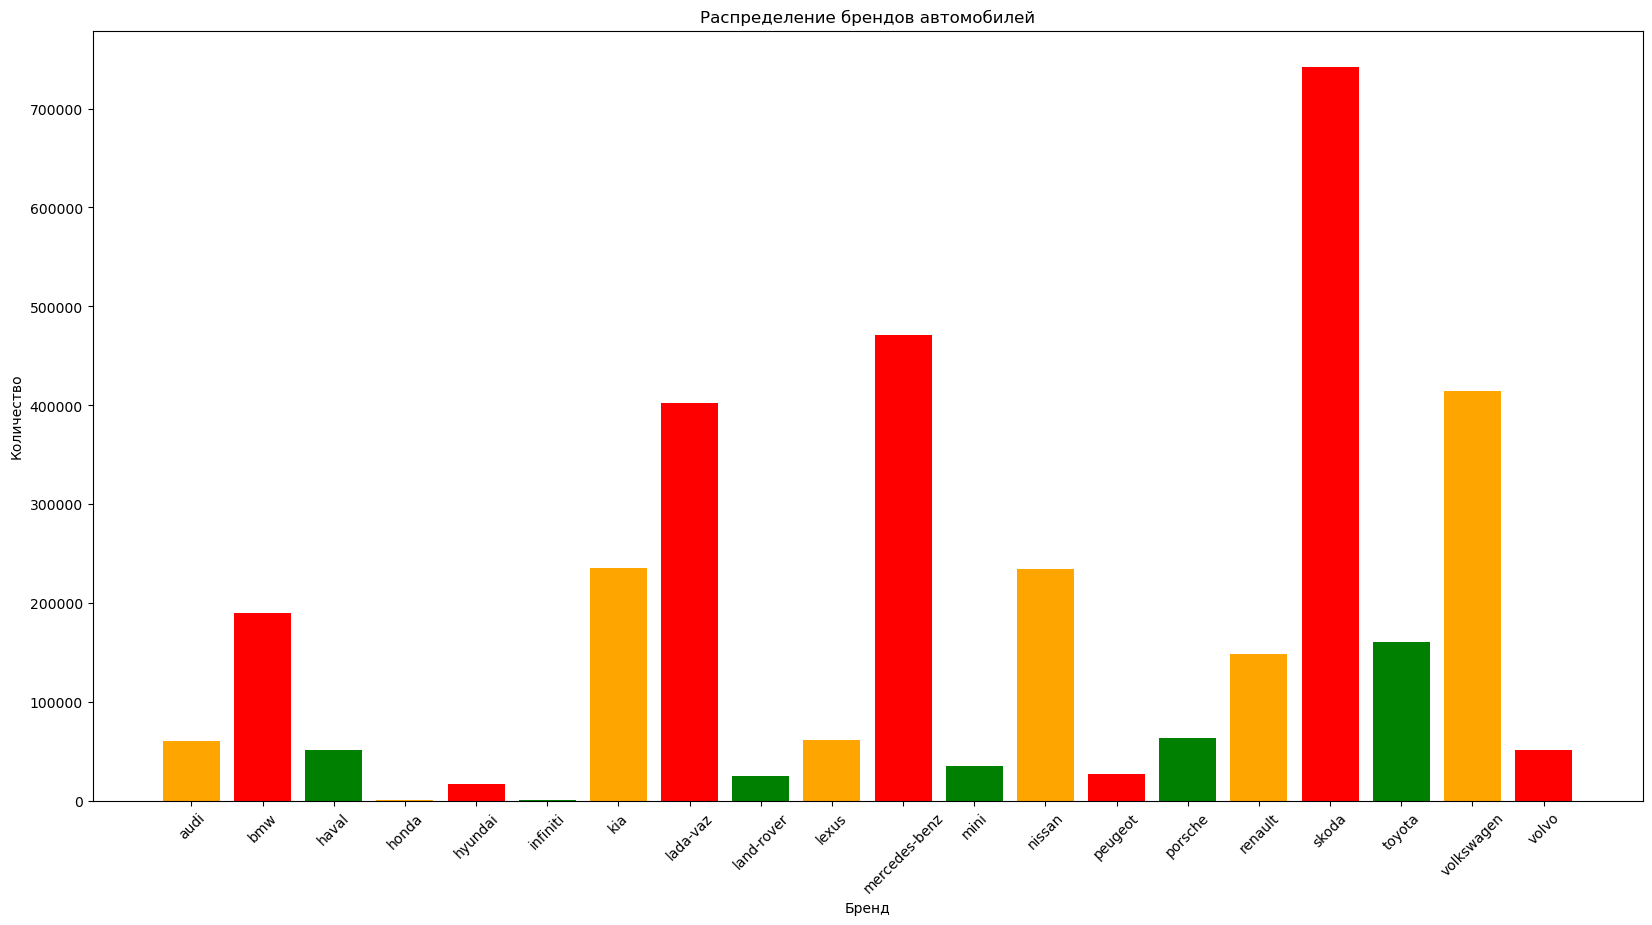

In [32]:
plt.figure(figsize=(20, 10))
plt.bar(stats_auto['car_brand'], stats_auto['count'], color=['orange', 'red', 'green'])
plt.xticks(rotation=45)
plt.xlabel('Бренд')
plt.ylabel('Количество')
plt.title('Распределение брендов автомобилей');

Чаще всего смотрят Skoda

### Устройства с которых заходят на сайт пользователи

In [45]:
stats_device = (df_sess_new.groupby(['device_category'], as_index=False)[['session_id']].count())
stats_device = stats_device.rename(columns={'session_id': 'count'})
stats_device

,device_category,count
0,desktop,366863
1,mobile,1474871
2,tablet,18308


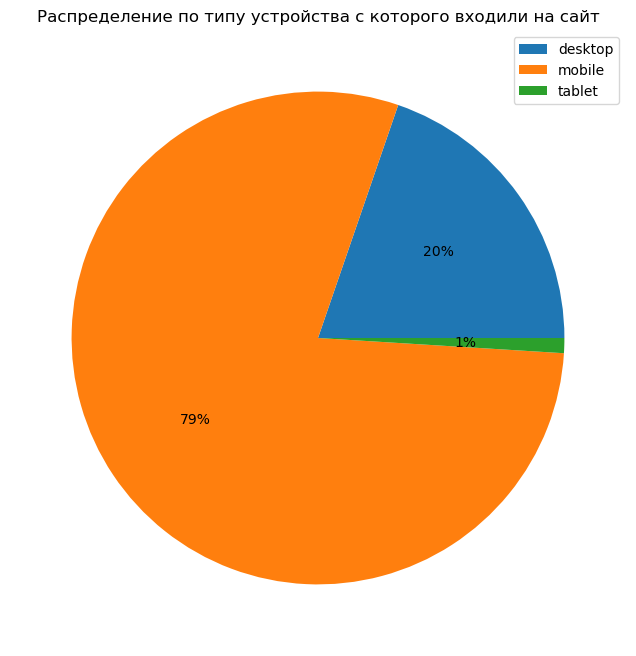

In [142]:
plt.figure(figsize=(12, 8))
plt.pie(stats_device['count'], labels=stats_device['device_category'], 
        labeldistance=None, autopct = '%1.0f%%')
plt.title("Распределение по типу устройства с которого входили на сайт")
plt.legend(loc='upper right')
plt.show();

### Браузеры с которых заходят на сайт пользователи

In [103]:
stats_browser = df_sess_new.groupby(['device_browser'], as_index=False)[['session_id']].count()
stats_browser = stats_browser.rename(columns={'session_id': 'count'})
stats_browser.sort_values('count', ascending=False)

,device_browser,count
6,Chrome,1013436
46,Safari,478562
52,YaBrowser,133311
47,Safari (in-app),69912
5,Android Webview,55369
48,Samsung Internet,47309
42,Opera,26817
9,Firefox,16588
8,Edge,16065
51,UC Browser,871


In [104]:
stats_browser['device_browser'] = stats_browser.apply(lambda x: x.device_browser if x['count'] >= 2000 else 'other', axis=1)

In [105]:
stats_browser_new = stats_browser.groupby(['device_browser'], as_index=False)[['count']].sum()
stats_browser_new.sort_values('count', ascending=False)

,device_browser,count
1,Chrome,1013436
5,Safari,478562
8,YaBrowser,133311
6,Safari (in-app),69912
0,Android Webview,55369
7,Samsung Internet,47309
4,Opera,26817
3,Firefox,16588
2,Edge,16065
9,other,2673


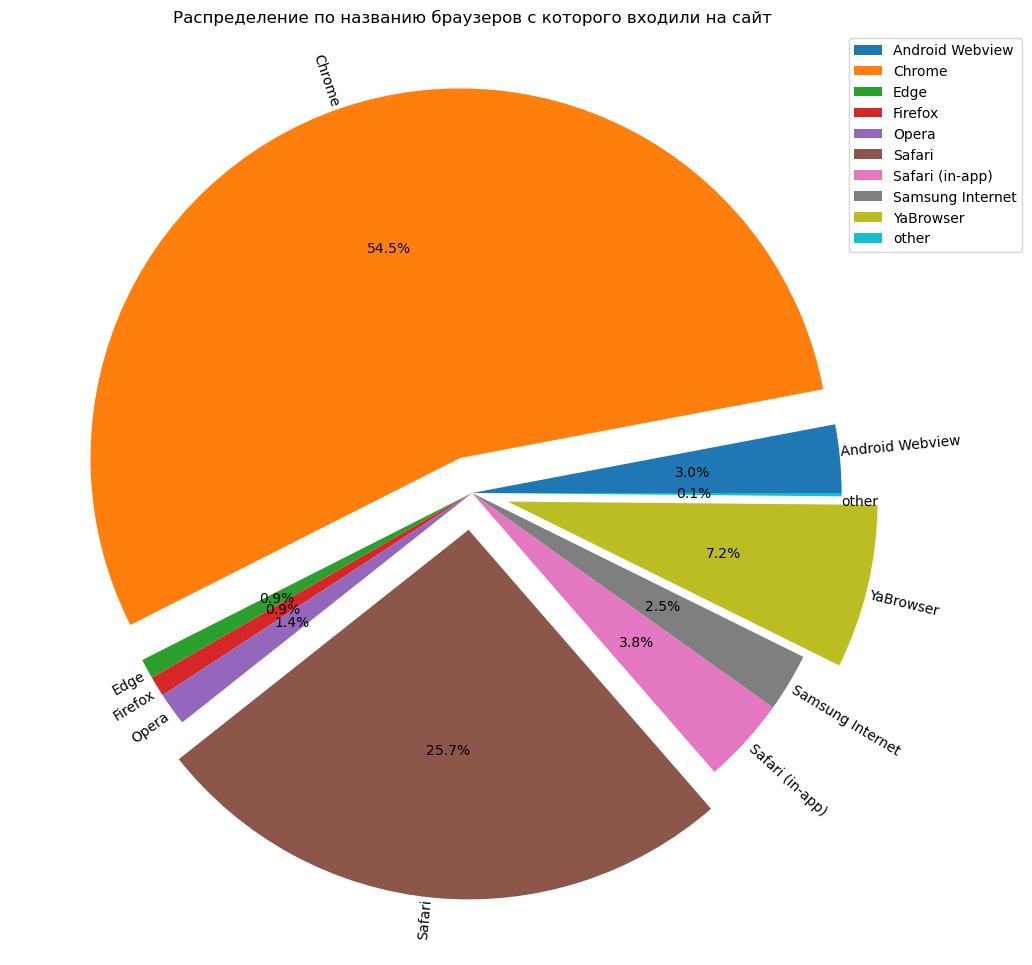

In [141]:
plt.figure(figsize=(12, 12))
plt.pie(stats_browser_new['count'], labels=stats_browser_new['device_browser'], 
        labeldistance=1.0, autopct = '%1.1f%%', explode=(0, 0.1, 0, 0, 0, 0.1, 0, 0, 0.1, 0),
        rotatelabels=True)
plt.title("Распределение по названию браузеров с которого входили на сайт")
plt.legend(loc='upper left', bbox_to_anchor=(0.9, 1.0))
plt.show();

### Динамика визитов на сайт

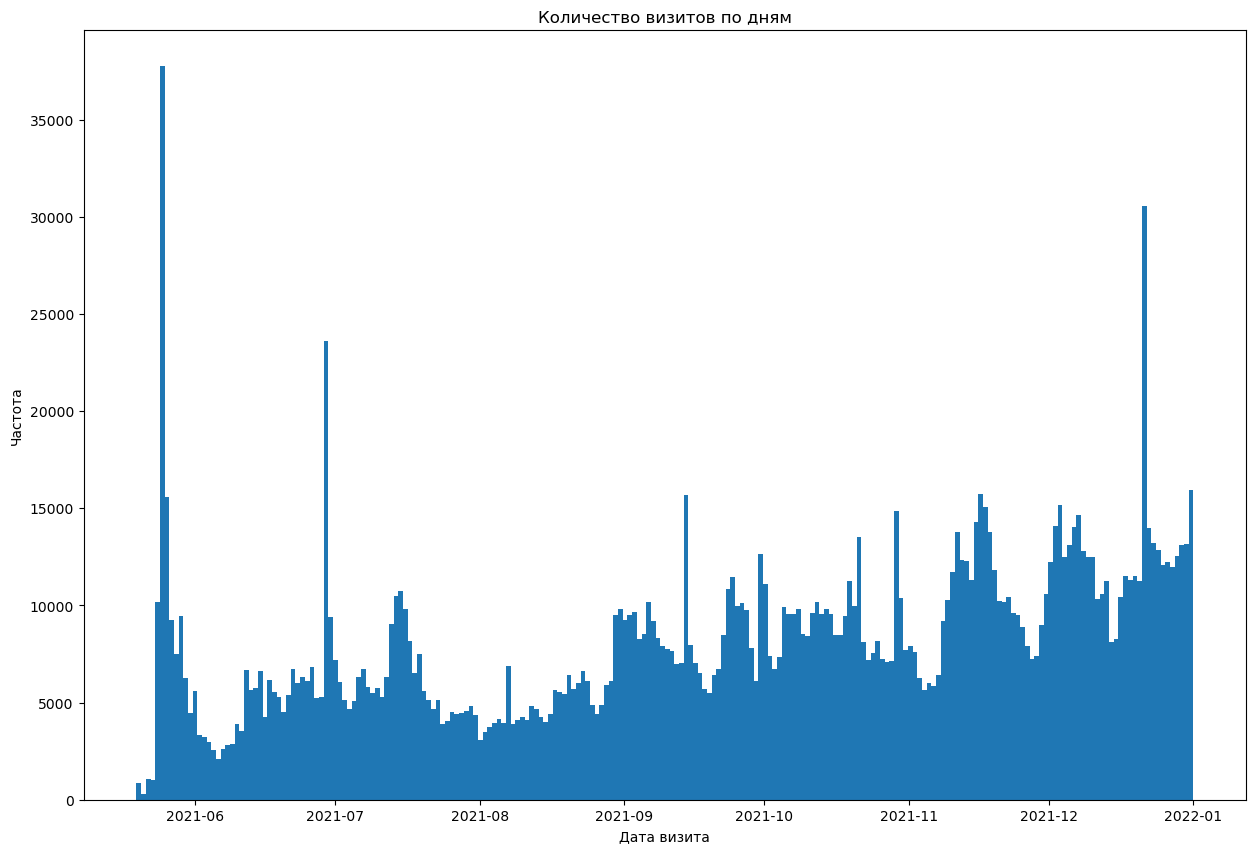

In [62]:
plt.figure(figsize=(15, 10))
plt.hist(df_sess_new['visit_date'], bins=df_sess_new['visit_date'].dt.date.nunique())
plt.xlabel('Дата визита')
plt.ylabel('Частота')
plt.title('Количество визитов по дням');

### Динамика событий 

In [83]:
stats_target = df_full[['session_id', 'hit_date', 'event_action']].copy()
df_hits_event_action = df_full[(df_full['event_action'] == 'sub_car_claim_click') |
                               (df_full['event_action'] == 'sub_car_claim_submit_click') |
                               (df_full['event_action'] == 'sub_open_dialog_click') |
                               (df_full['event_action'] == 'sub_custom_question_submit_click') |
                               (df_full['event_action'] == 'sub_call_number_click') |
                               (df_full['event_action'] == 'sub_callback_submit_click') |
                               (df_full['event_action'] == 'sub_submit_success') |
                               (df_full['event_action'] == 'sub_car_request_submit_click')]

Если произошло целевое событие, то заполним значением 1, если нет, то 0.

In [84]:
stats_target['target_action'] = df_hits_event_action.apply(lambda x: 1, axis=1)

In [85]:
stats_target['target_action'] = stats_target['target_action'].fillna(0)

In [88]:
stats_target['target_action'].value_counts()

0.0    15357569
1.0      101813
Name: target_action, dtype: int64

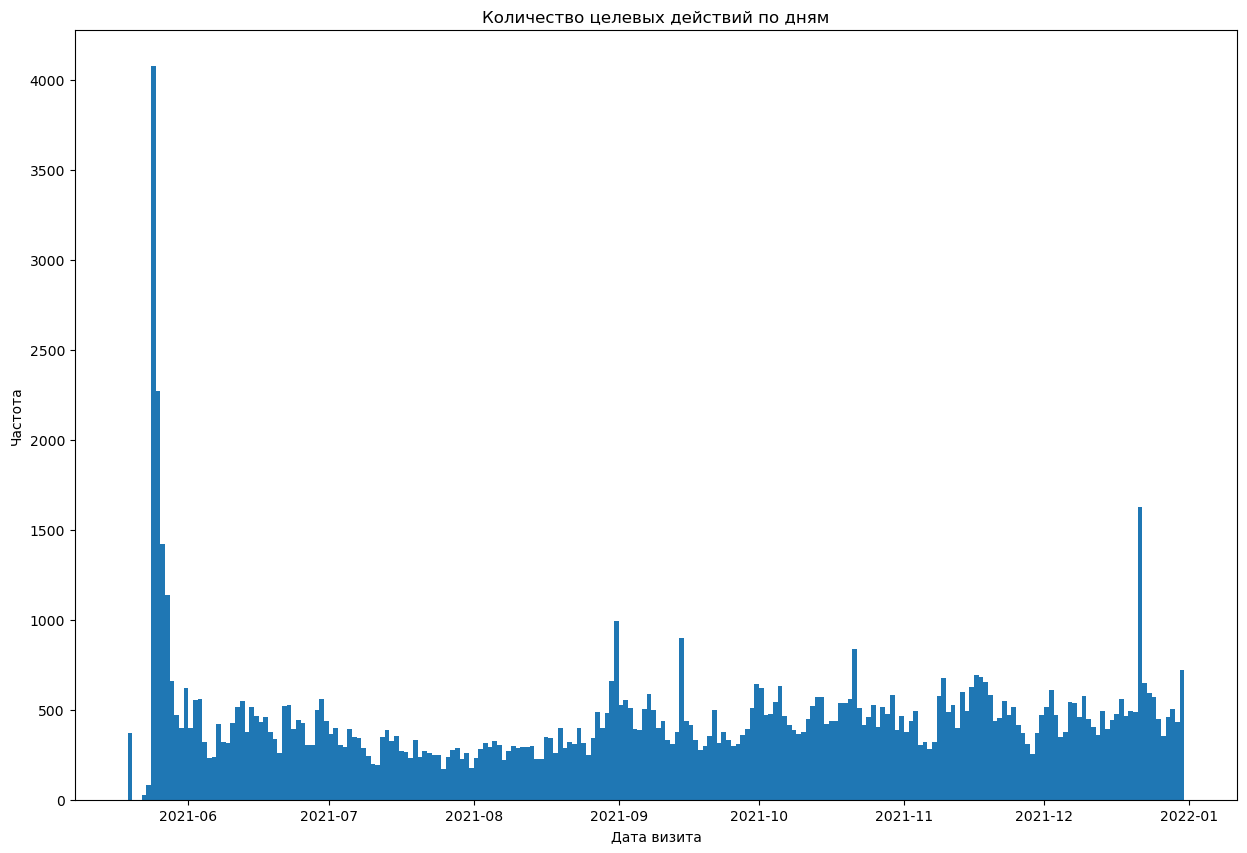

In [112]:
plt.figure(figsize=(15, 10))
plt.hist(stats_target['hit_date'][stats_target['target_action'] == 1], bins=226)
plt.xlabel('Дата визита')
plt.ylabel('Частота')
plt.title('Количество целевых действий по дням');

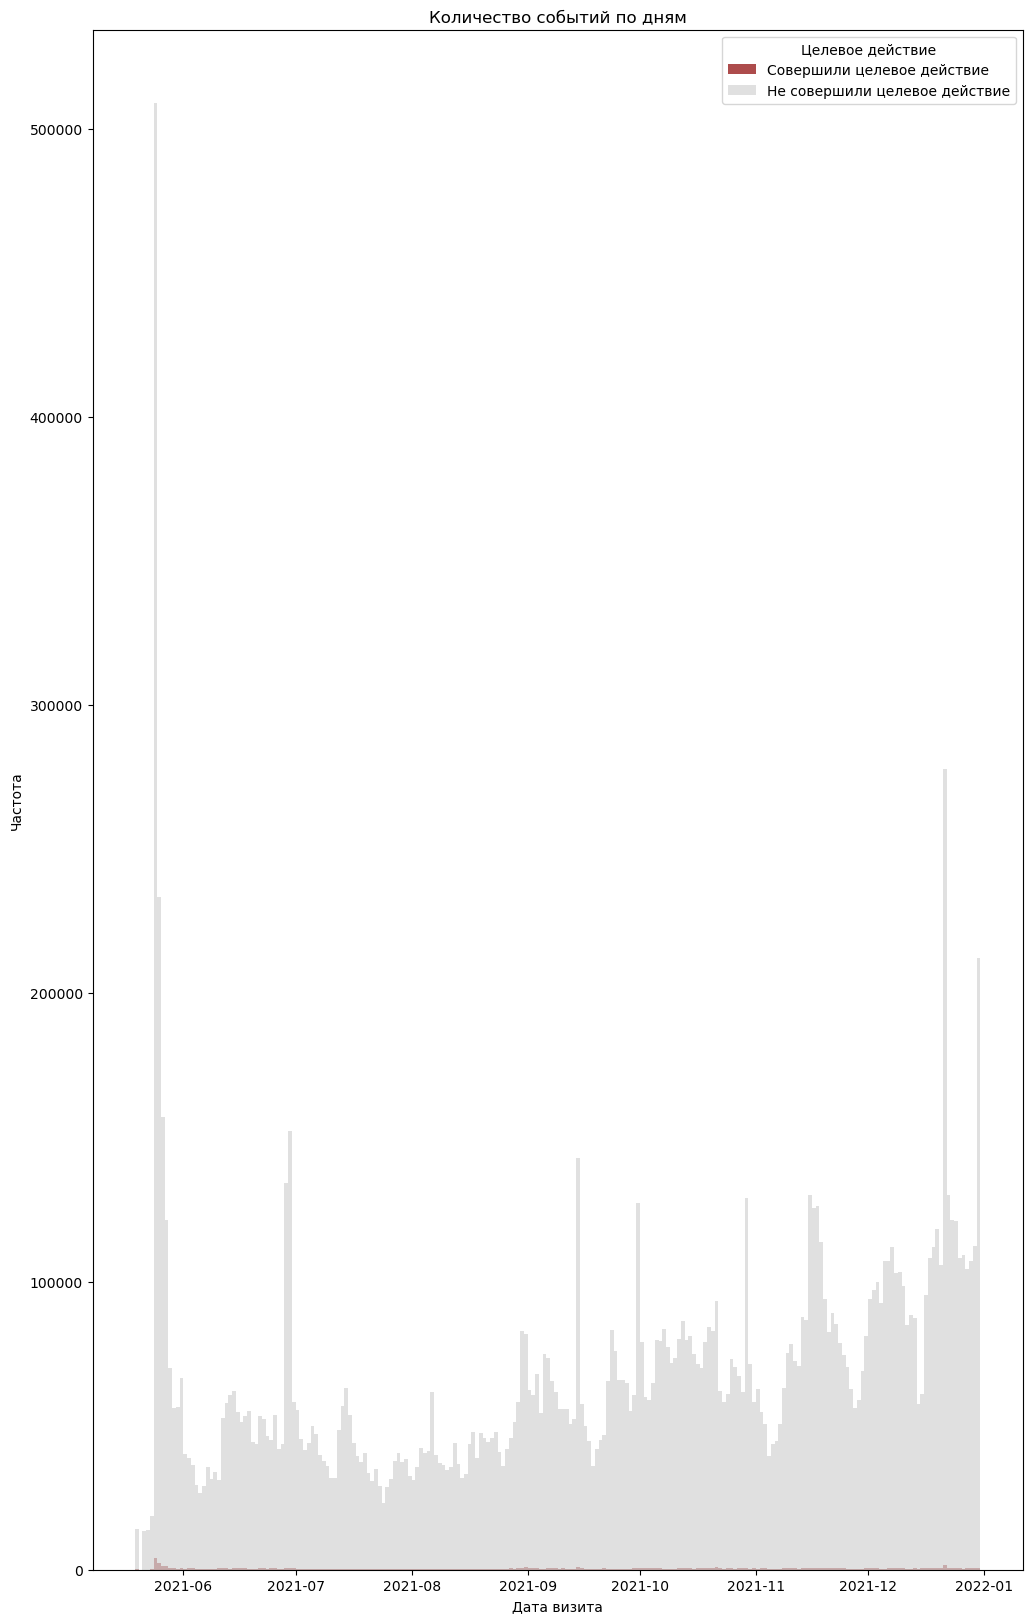

In [111]:

fig, ax = plt.subplots(figsize=(12,20))
ax.hist(stats_target['hit_date'][stats_target['target_action'] == 1], bins=226, color='darkred', alpha=0.7)
ax.hist(stats_target['hit_date'][stats_target['target_action'] != 1], bins=226, color='lightgray', alpha=0.7)
plt.xlabel('Дата визита')
plt.ylabel('Частота')
plt.title('Количество событий по дням');
plt.legend({'Совершили целевое действие': 'darkred', 'Не совершили целевое действие': 'lightgray'}, title="Целевое действие");

## 6. Подготовка для создания базы данных

Посмотрим максимальную длину строки каждого столбца

In [117]:
for column in df_full.columns:
    print(f'{column}: {df_full[column].astype(str).str.len().max()}')

session_id: 41
visit_date: 19
visit_number: 3
utm_source: 20
utm_medium: 17
utm_campaign: 20
utm_adcontent: 20
device_category: 7
device_os: 13
device_brand: 14
device_screen_resolution: 10
device_browser: 32
geo_country: 24
geo_city: 28
hit_date: 10
hit_number: 3
event_category: 29
event_action: 40
car_brand: 13
car_model: 18


Разобьем session_id на три числа

In [122]:
df_full['session_id1'] = [int(x[0])for x in df_full['session_id'].str.split('.')]
df_full['session_id2'] = [int(x[1])for x in df_full['session_id'].str.split('.')]
df_full['session_id3'] = [int(x[2])for x in df_full['session_id'].str.split('.')]
df_full

,session_id,visit_date,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,...,geo_city,hit_date,hit_number,event_category,event_action,car_brand,car_model,session_id1,session_id2,session_id3
0,9055434745589932991.1637753792.1637753792,2021-11-24 14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,...,Zlatoust,2021-11-24,3,sub_page_view,sub_landing,empty,empty,9055434745589932991,1637753792,1637753792
1,9055434745589932991.1637753792.1637753792,2021-11-24 14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,...,Zlatoust,2021-11-24,4,sub_button_click,sub_view_cars_click,empty,empty,9055434745589932991,1637753792,1637753792
2,905544597018549464.1636867290.1636867290,2021-11-14 08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Android,Samsung,...,Moscow,2021-11-14,3,sub_page_view,sub_landing,empty,empty,905544597018549464,1636867290,1636867290
3,9055446045651783499.1640648526.1640648526,2021-12-28 02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,...,Krasnoyarsk,2021-12-28,10,search_form,search_form_region,empty,empty,9055446045651783499,1640648526,1640648526
4,9055446045651783499.1640648526.1640648526,2021-12-28 02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,...,Krasnoyarsk,2021-12-28,13,search_form,search_form_region,empty,empty,9055446045651783499,1640648526,1640648526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15459377,9055430416266113553.1640968742.1640968742,2021-12-31 19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,desktop,Linux,other,...,Moscow,2021-12-31,11,card_web,view_card,bmw,3-serii,9055430416266113553,1640968742,1640968742
15459378,9055430416266113553.1640968742.1640968742,2021-12-31 19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,desktop,Linux,other,...,Moscow,2021-12-31,16,card_web,view_new_card,bmw,3-serii,9055430416266113553,1640968742,1640968742
15459379,9055430416266113553.1640968742.1640968742,2021-12-31 19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,desktop,Linux,other,...,Moscow,2021-12-31,3,card_web,view_card,mercedes-benz,e-klasse,9055430416266113553,1640968742,1640968742
15459380,9055430416266113553.1640968742.1640968742,2021-12-31 19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,desktop,Linux,other,...,Moscow,2021-12-31,14,card_web,view_card,bmw,3-serii,9055430416266113553,1640968742,1640968742


In [123]:
df_full.drop(columns='session_id')

,visit_date,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_screen_resolution,...,geo_city,hit_date,hit_number,event_category,event_action,car_brand,car_model,session_id1,session_id2,session_id3
0,2021-11-24 14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,...,Zlatoust,2021-11-24,3,sub_page_view,sub_landing,empty,empty,9055434745589932991,1637753792,1637753792
1,2021-11-24 14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,...,Zlatoust,2021-11-24,4,sub_button_click,sub_view_cars_click,empty,empty,9055434745589932991,1637753792,1637753792
2,2021-11-14 08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Android,Samsung,385x854,...,Moscow,2021-11-14,3,sub_page_view,sub_landing,empty,empty,905544597018549464,1636867290,1636867290
3,2021-12-28 02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,...,Krasnoyarsk,2021-12-28,10,search_form,search_form_region,empty,empty,9055446045651783499,1640648526,1640648526
4,2021-12-28 02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,...,Krasnoyarsk,2021-12-28,13,search_form,search_form_region,empty,empty,9055446045651783499,1640648526,1640648526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15459377,2021-12-31 19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,desktop,Linux,other,1366x768,...,Moscow,2021-12-31,11,card_web,view_card,bmw,3-serii,9055430416266113553,1640968742,1640968742
15459378,2021-12-31 19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,desktop,Linux,other,1366x768,...,Moscow,2021-12-31,16,card_web,view_new_card,bmw,3-serii,9055430416266113553,1640968742,1640968742
15459379,2021-12-31 19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,desktop,Linux,other,1366x768,...,Moscow,2021-12-31,3,card_web,view_card,mercedes-benz,e-klasse,9055430416266113553,1640968742,1640968742
15459380,2021-12-31 19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,desktop,Linux,other,1366x768,...,Moscow,2021-12-31,14,card_web,view_card,bmw,3-serii,9055430416266113553,1640968742,1640968742
